<a href="https://colab.research.google.com/github/shahtvisha/TextSummarizationSeq2Seq2LSTM/blob/main/TextSummarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.9 MB/s eta 0:00:00


In [3]:
import datasets

In [4]:
from datasets import load_dataset
dataset = load_dataset("ccdv/pubmed-summarization")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for ccdv/pubmed-summarization contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/ccdv/pubmed-summarization
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `d

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['article', 'abstract'],
        num_rows: 119924
    })
    validation: Dataset({
        features: ['article', 'abstract'],
        num_rows: 6633
    })
    test: Dataset({
        features: ['article', 'abstract'],
        num_rows: 6658
    })
})

In [7]:
dataset['test'][0]

{'article': "anxiety affects quality of life in those living with parkinson 's disease ( pd ) more so than overall cognitive status , motor deficits , apathy , and depression [ 13 ] . \n although anxiety and depression are often related and coexist in pd patients , recent research suggests that anxiety rather than depression is the most prominent and prevalent mood disorder in pd [ 5 , 6 ] . yet , \n our current understanding of anxiety and its impact on cognition in pd , as well as its neural basis and best treatment practices , remains meager and lags far behind that of depression . \n overall , neuropsychiatric symptoms in pd have been shown to be negatively associated with cognitive performance . \n for example , higher depression scores have been correlated with lower scores on the mini - mental state exam ( mmse ) [ 8 , 9 ] as well as tests of memory and executive functions ( e.g. , attention ) [ 1014 ] . \n likewise , apathy and anhedonia in pd patients have been associated with

In [9]:
dataset['validation'][0]

{'article': "venous thromboembolism ( vte ) comprising of deep vein thrombosis ( dvt ) and pulmonary embolism ( pe ) can result in significant mortality , morbidity , and healthcare expenditure . \n approximately , one - third of patients with symptomatic vte manifests pe , whereas two - thirds manifest dvt alone . \n both dvt and pe can be clinically silent ( asymptomatic ) and hence not suspected . \n if undiagnosed , asymptomatic vte can lead to chronic venous disease or recurrent vte and long - term debilitating sequelae such as postthrombotic syndrome and chronic thromboembolic pulmonary hypertension . \n vte is not only disabling but also prolongs hospital stay and increases the cost of treatment . \n along with myocardial infarction and arrhythmia ( due to electrolyte imbalance ) , pe is one of the commonest causes of sudden unexplained deaths in hospitalized patients . \n it is estimated that 20 million cases of lower extremity dvt occur in the usa alone . \n the prevailing not

Data Exploration

In [12]:
import matplotlib.pyplot as plt

In [11]:
# Summary statistics
num_articles = len(dataset['train']['article'])
avg_article_length = sum(len(article) for article in dataset['train']['article']) / num_articles
avg_abstract_length = sum(len(abstract) for abstract in dataset['train']['abstract']) / num_articles

print("Number of articles:", num_articles)
print("Average article length:", avg_article_length)
print("Average abstract length:", avg_abstract_length)


Number of articles: 119924
Average article length: 17585.276233281078
Average abstract length: 1233.1884860411594


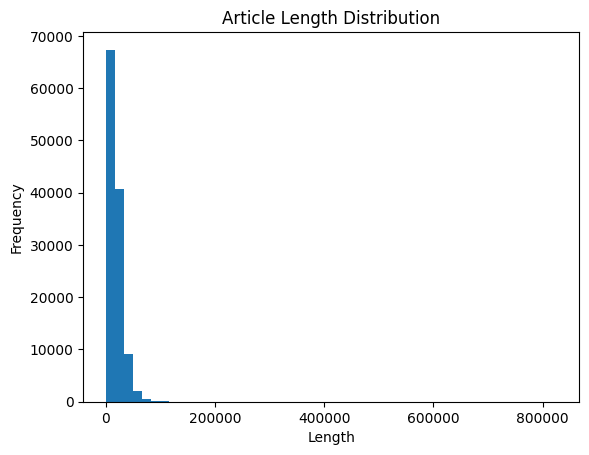

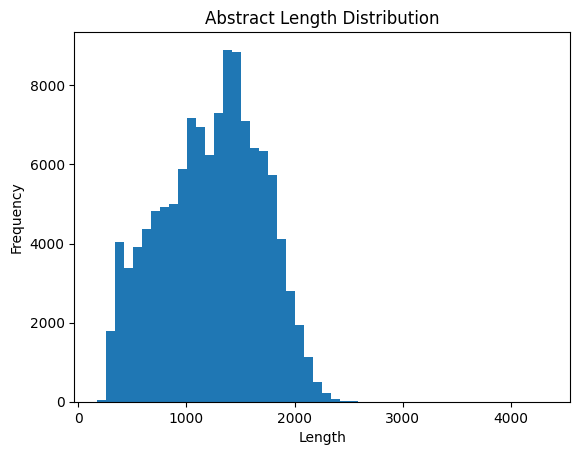

In [13]:
# Article length distribution
plt.hist([len(article) for article in dataset['train']['article']], bins=50)
plt.title('Article Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# Abstract length distribution
plt.hist([len(abstract) for abstract in dataset['train']['abstract']], bins=50)
plt.title('Abstract Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df_text_length = pd.DataFrame()
for split, data in dataset.items():
    for feat in data:
        df_text_length[f'{split}_{feat}_length'] = [len(text.split()) for text in data[feat]]

# Function to create histogram and box plot
def histogram_boxplot(df, color_histogram, color_boxplot, bins, range_, show_outliers, title):
    plt.figure(figsize=(10, 5))
    plt.hist(df.values, bins=bins, range=range_, color=color_histogram, alpha=0.7)
    plt.boxplot(df.values, showfliers=show_outliers, patch_artist=True, boxprops=dict(facecolor=color_boxplot))
    plt.title(title)
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.xticks(range(1, df.shape[1] + 1), df.columns, rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function to create histogram and box plot
histogram_boxplot(df_text_length, '#89c2e0', '#d500ff', 20, (0, 100), True, 'Text Length Distribution in PubMed Dataset')